# Inspect Processed Subdirectories

#### Updated: Mar 22, 2022

#  

Create methods to systematically inspect processed subdirectories, for quality and subsequent error analysis.

In [1]:
import pandas as pd
import numpy as np
import os
import random
from random import randrange
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
logDir = '//scientific/L-MP-Data/Massive files/Python/rnaidoo/Alouette_I/'
imageDir = 'U:/Data_Science/Projects_data/Alouette_I/04_processed/'
resultDir = 'U:/Data_Science/Projects_data/Alouette_I/05_result/'

#  

#### Functions:

In [3]:
def inspect_ionograms(directory, subdirectory, sample_list, imageDir, resultDir):
    
    mapped_coords_list = os.listdir(resultDir + 'mapped_coords/' + directory + '/' + subdirectory + '/')
    df_result = pd.read_csv(resultDir + directory + '/result-' + directory + '_' + subdirectory + '.csv')
    
    for image_fn in sample_list:
        print(image_fn)
        image_fn_ = image_fn.replace('.png', '')

        f, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1.2],}, figsize=(20,5))

        for mapped_coord_fn in mapped_coords_list:
            if '_' + image_fn_ + '.npy' in mapped_coord_fn:
                print(mapped_coord_fn)
                arr_load = np.load(resultDir + 'mapped_coords/' + directory + '/' + subdirectory + '/' + mapped_coord_fn)
                print(arr_load.shape)

                df_plot = pd.DataFrame({
                'f': arr_load[:, 0],
                'depth': arr_load[:, 1]
                })
                df_plot['depth_plot'] = -1*df_plot['depth']

                axs[0].scatter(df_plot['f'], df_plot['depth_plot'], 1, color='black')
                axs[0].set(xlabel='frequency (MHz)', ylabel='depth (km)')

        img = mpimg.imread(imageDir + directory + '/' + subdirectory + '/' + image_fn)
        axs[1].imshow(img)
        axs[1].set(xticks=[], yticks=[])
        
        #Results
        df_result_img = df_result.loc[df_result['filename'] == image_fn]
        
        plt.show()
        print(df_result_img['processed_image_class'].iloc[0])
        print(df_result_img['Station Name'].iloc[0])
        if df_result_img['processed_image_class'].iloc[0] == 'loss':
            print(df_result_img['func_name'].iloc[0])
        elif df_result_img['processed_image_class'].iloc[0] == 'outlier':
            print(df_result_img['func_name'].iloc[0])
        print('')
        print('')

#  

#### Plot mapped coords for sample of images in random subdirectory:

In [4]:
sample_size = 10

df_process_log = pd.read_csv(logDir + 'process_log.csv')
print(len(df_process_log))
subdir_ids_list = df_process_log['subdir_id'].unique()
df_process_log.head()

98


Roll Subdirectory  Images_processed  Images_dot  Images_num  \
0  R014207978F          319               239         206           5   
1   R014207966      1185-1B               386           0         383   
2   R014207975       1108-B               363           0         347   
3   R014207957      2631-1A               333           0         320   
4   R014207966       1150-B               369           0         362   

   Images_loss  Images_outlier  Process_time           Process_timestamp User  \
0           11              17    259.625649  2022-12-15 23:28:15.951151  Rav   
1            0               3   1415.449691  2022-12-15 23:51:57.608703  Rav   
2            4              12    367.330205  2022-12-15 23:58:19.342118  Rav   
3            4               9    607.819416  2022-12-16 00:08:43.220755  Rav   
4            1               6    775.810147  2022-12-16 00:21:52.993215  Rav   

            subdir_id  
0     R014207978F_319  
1  R014207966_1185-1B  
2   R014207975_1108-B  
3  R014207957_2631-1A  
4   R014207966_1150-B

Select random subdirectory:

In [5]:
subdir_id = subdir_ids_list[randrange(len(subdir_ids_list))]
parts = subdir_id.split('_')
directory = parts[0]
subdirectory = parts[1]
print(directory)
print(subdirectory)

R014207951
2413-3A


Draw random sample of images from subdirectory, and inspect:

In [6]:
images_list = os.listdir(imageDir + directory + '/' + subdirectory + '/')
sample_list = random.sample(images_list, sample_size)
sample_list

['79.png',
 '277.png',
 '276.png',
 '159.png',
 '109.png',
 '172.png',
 '300.png',
 '222.png',
 '339.png',
 '189.png']

79.png
mapped_coords-R014207951_2413-3A_79.npy
(58959, 2)


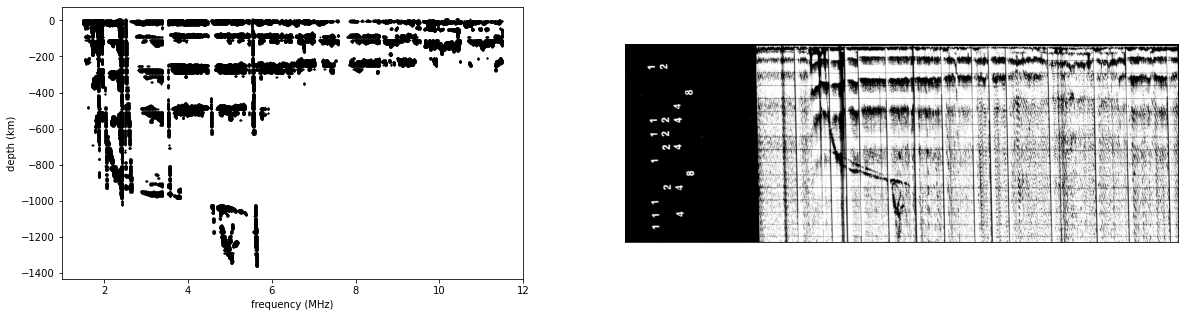

num
Fort Myers, Florida


277.png
mapped_coords-R014207951_2413-3A_277.npy
(15068, 2)


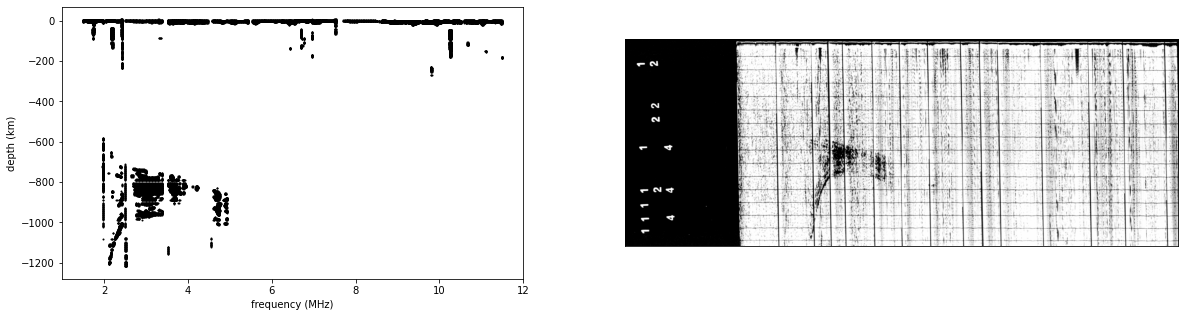

num
Ottawa, Canada


276.png
mapped_coords-R014207951_2413-3A_276.npy
(20188, 2)


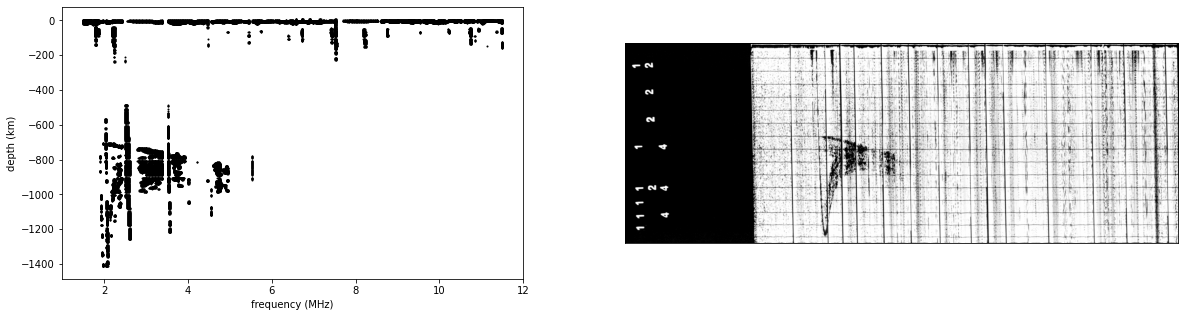

num
Fort Myers, Florida


159.png
mapped_coords-R014207951_2413-3A_159.npy
(17029, 2)


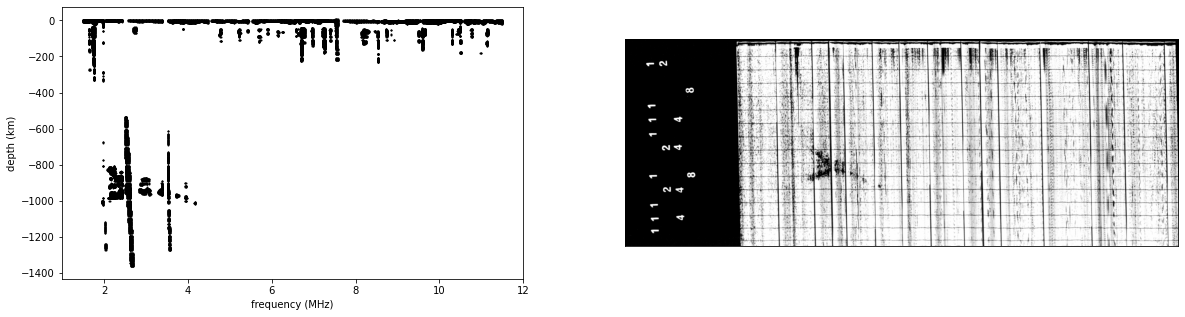

num
Fort Myers, Florida


109.png
mapped_coords-R014207951_2413-3A_109.npy
(73015, 2)


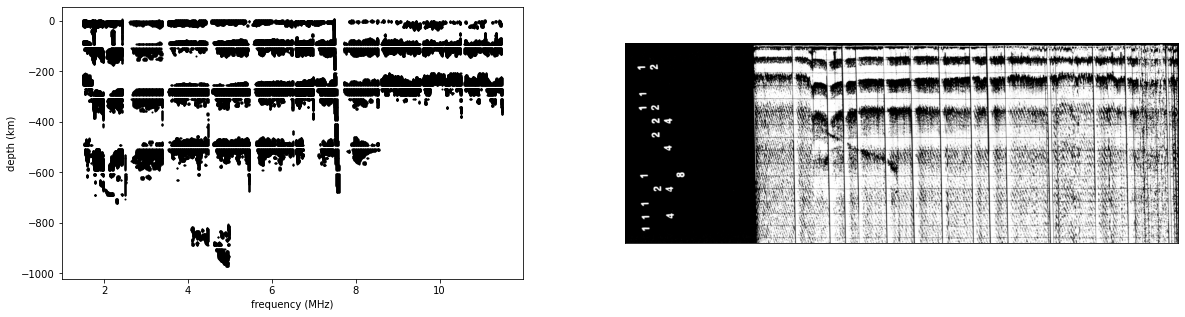

num
Fort Myers, Florida


172.png
mapped_coords-R014207951_2413-3A_172.npy
(36095, 2)


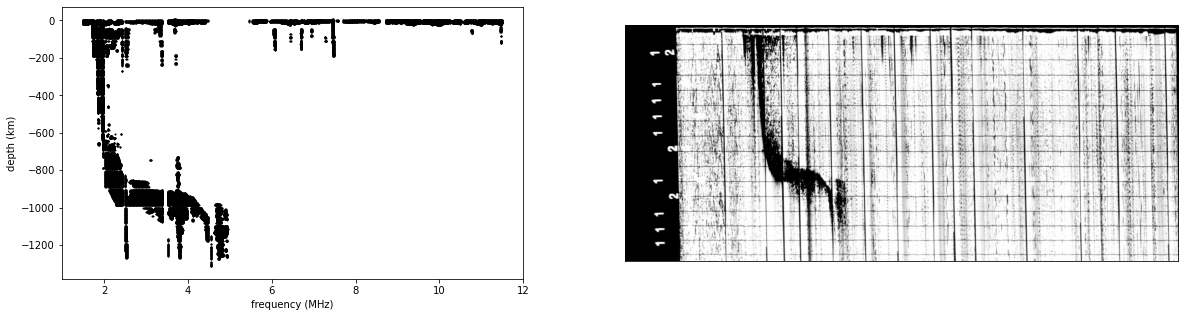

num
Rosman, No.Carolina


300.png
mapped_coords-R014207951_2413-3A_300.npy
(26490, 2)


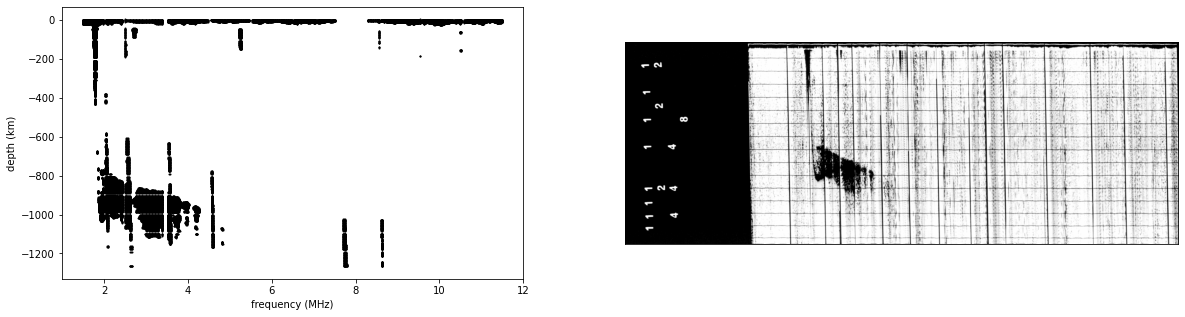

num
Fort Myers, Florida


222.png
mapped_coords-R014207951_2413-3A_222.npy
(49550, 2)


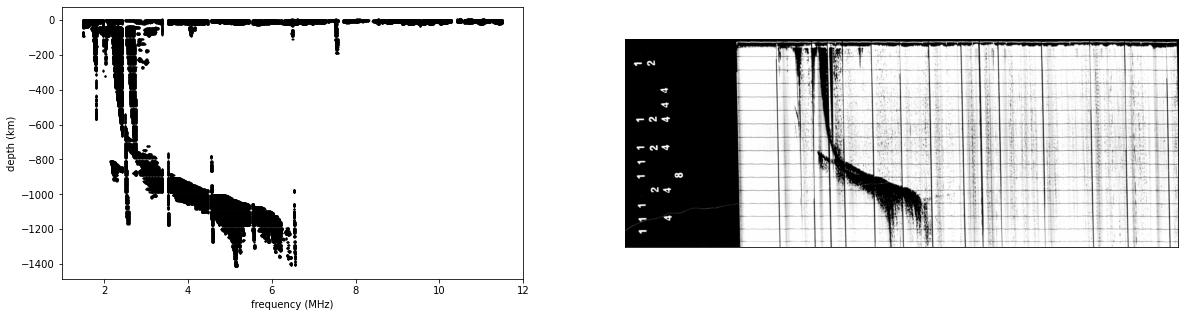

num
Fort Myers, Florida


339.png
mapped_coords-R014207951_2413-3A_339.npy
(40385, 2)


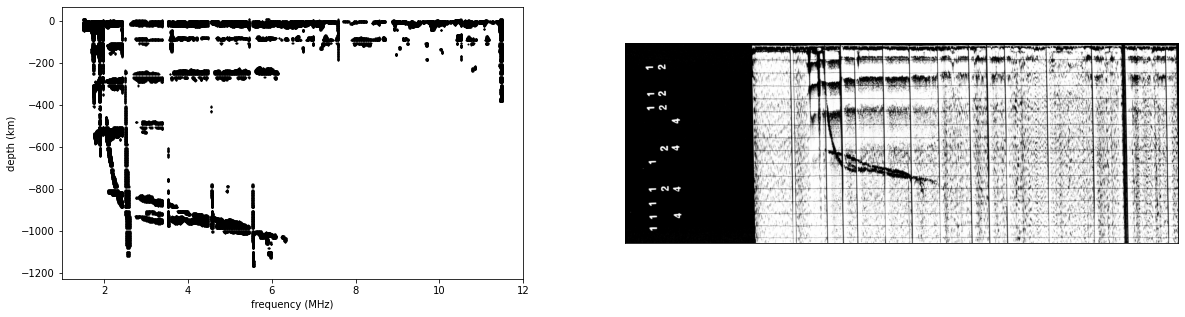

num
Fort Myers, Florida


189.png


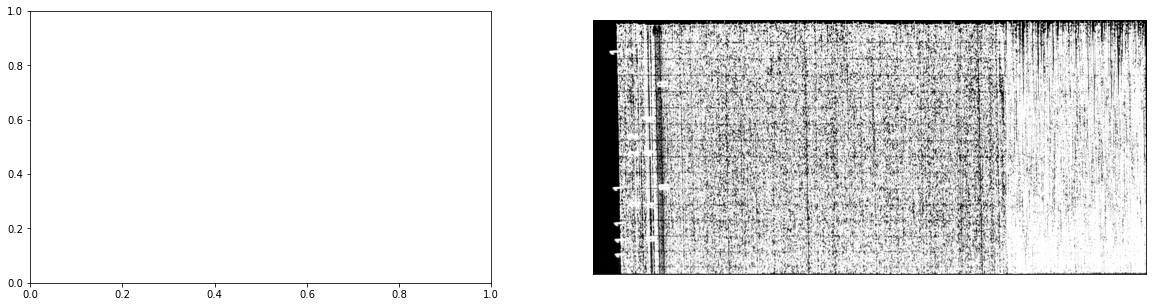

outlier
nan
image_segmentation.segment_images_in_subdir.segment_images: metadata not on left or bottom




In [7]:
inspect_ionograms(directory=directory, subdirectory=subdirectory, sample_list=sample_list, imageDir=imageDir, resultDir=resultDir)

#  

#### Inpsect high-loss subdirectories:

In [8]:
df1 = df_process_log.sort_values('Images_loss', ascending=False).reset_index(drop=True)
df1.head(20)

Roll Subdirectory  Images_processed  Images_dot  Images_num  \
0    R014207975       1129-A               338           0         221   
1    R014207939        898-A               380           0         276   
2    R014207816     3374-A38               283           0         192   
3    R014207938        930-A               345           0         256   
4    R014207975       1112-A               336           0         239   
5    R014207947      1911-4B               243           0         157   
6    R014207844     2912-43B               323           0         249   
7    R014207841     3077-13B               300           0         234   
8    R014207955     2836-50B               295           0         226   
9    R014207844     2910-43B               333           0         268   
10  R014207979F          288               421         345           3   
11   R014207955     2881-43B               315           0         284   
12   R014207955     2841-50B               301           0         271   
13   R014207958      2791-6A               329           0         279   
14   R014207943      2054-1B               269           0         236   
15   R014207958      2805-7A               233           0         191   
16   R014207957     2643-15B               341           0         317   
17  R014207978F          319               239         206           5   
18   R014207965      1653-6B               315           0         279   
19   R014207967      1389-1B               371           0         347   

    Images_loss  Images_outlier  Process_time           Process_timestamp  \
0           100              17    127.930796  2022-12-16 03:20:18.440591   
1            90              14     93.184457  2022-12-16 05:29:57.180206   
2            86               5     38.688548  2022-12-16 05:22:15.087358   
3            78              11    104.658110  2022-12-16 11:32:13.522794   
4            73              24     93.161578  2022-12-16 12:42:17.197821   
5            72              14     63.402274  2022-12-16 13:20:11.885771   
6            66               8    529.017058  2022-12-16 10:27:51.095825   
7            59               7    362.752027  2022-12-16 12:20:10.484752   
8            57              12    862.442137  2022-12-16 01:54:06.894005   
9            55              10    329.093965  2022-12-16 13:47:12.796814   
10           23              50    157.020877  2022-12-16 00:24:43.050306   
11           20              11    583.359695  2022-12-16 00:53:09.909313   
12           18              12    567.900161  2022-12-16 12:13:39.170721   
13           18              32    262.931260  2022-12-16 04:08:35.960306   
14           14              19    210.094155  2022-12-16 11:44:51.329961   
15           13              29    156.597131  2022-12-16 12:54:45.312615   
16           11              13    529.964229  2022-12-16 09:35:54.525617   
17           11              17    259.625649  2022-12-15 23:28:15.951151   
18           11              25    163.434292  2022-12-16 12:40:26.204729   
19           11              13    708.125069  2022-12-16 05:14:11.563814   

   User            subdir_id  
0   Rav    R014207975_1129-A  
1   Rav     R014207939_898-A  
2   Rav  R014207816_3374-A38  
3   Rav     R014207938_930-A  
4   Rav    R014207975_1112-A  
5   Rav   R014207947_1911-4B  
6   Rav  R014207844_2912-43B  
7   Rav  R014207841_3077-13B  
8   Rav  R014207955_2836-50B  
9   Rav  R014207844_2910-43B  
10  Rav      R014207979F_288  
11  Rav  R014207955_2881-43B  
12  Rav  R014207955_2841-50B  
13  Rav   R014207958_2791-6A  
14  Rav   R014207943_2054-1B  
15  Rav   R014207958_2805-7A  
16  Rav  R014207957_2643-15B  
17  Rav      R014207978F_319  
18  Rav   R014207965_1653-6B  
19  Rav   R014207967_1389-1B

R014207975
1129-A

1.png


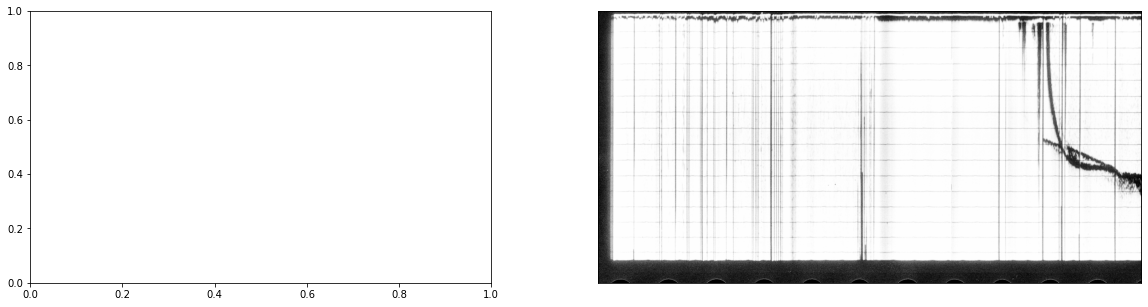

loss
nan
nan


169.png
mapped_coords-R014207975_1129-A_169.npy
(13927, 2)


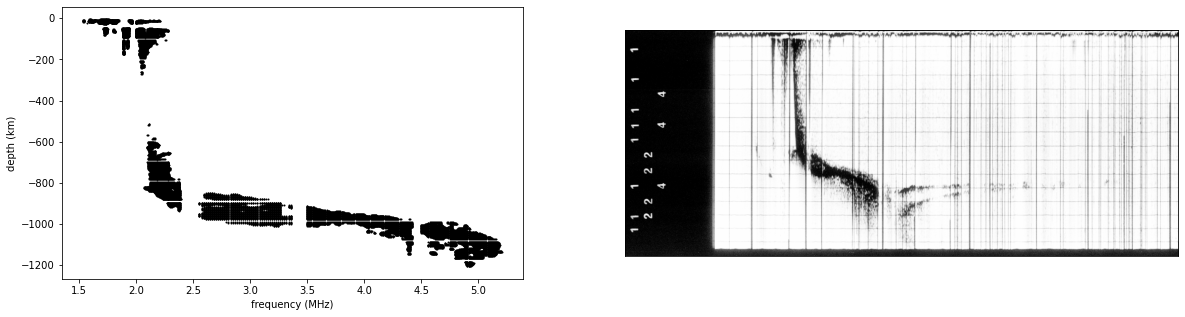

num
Resolute Bay, No.W.Territories


238.png


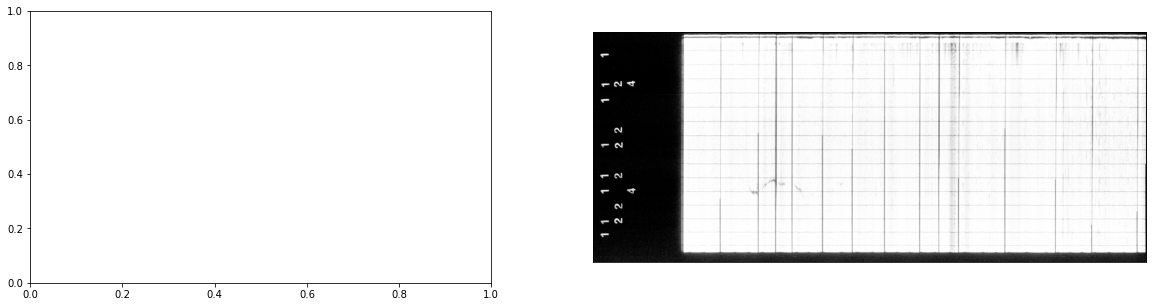

loss
nan
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth


31.png
mapped_coords-R014207975_1129-A_31.npy
(7445, 2)


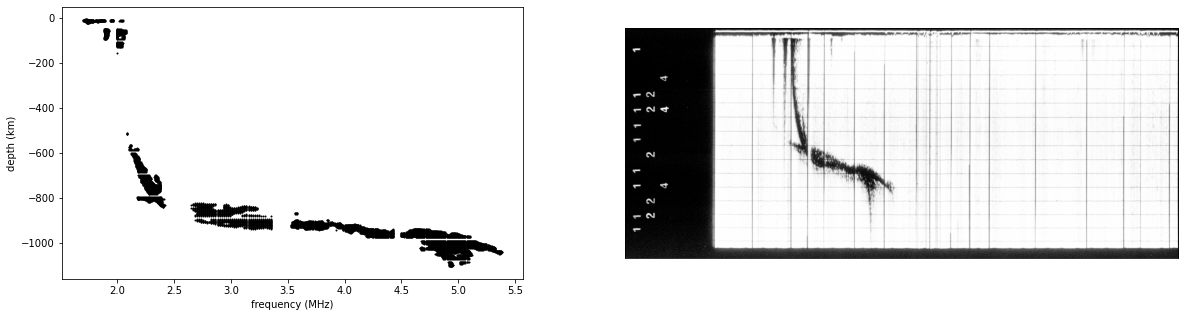

num
Resolute Bay, No.W.Territories


129.png
mapped_coords-R014207975_1129-A_129.npy
(12514, 2)


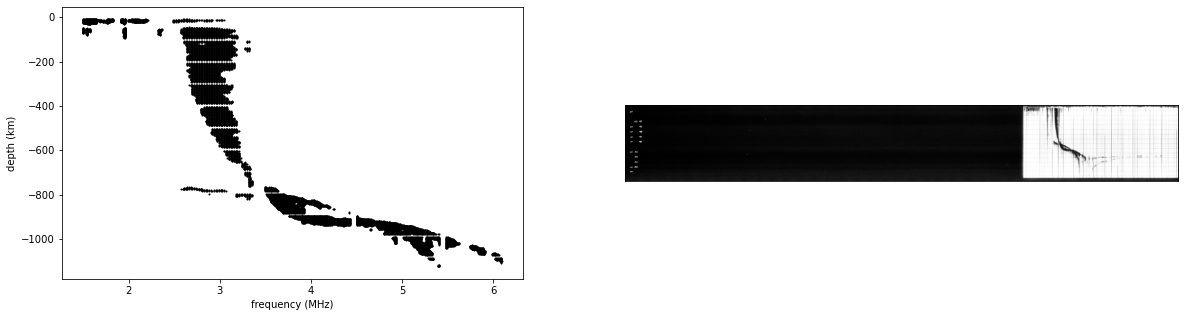

num
Resolute Bay, No.W.Territories


254.png
mapped_coords-R014207975_1129-A_254.npy
(188, 2)


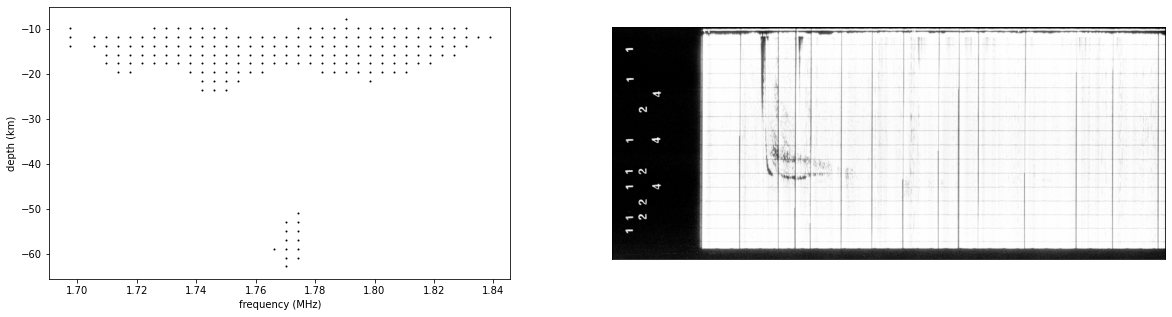

num
Resolute Bay, No.W.Territories


103.png
mapped_coords-R014207975_1129-A_103.npy
(7000, 2)


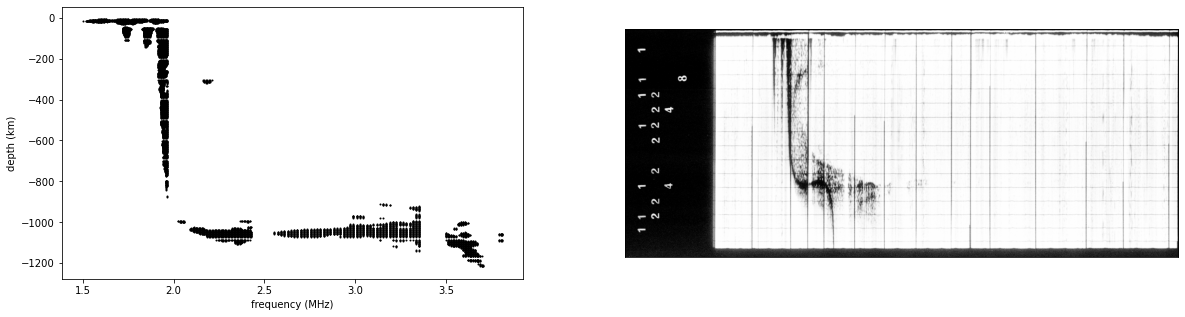

num
Resolute Bay, No.W.Territories


96.png


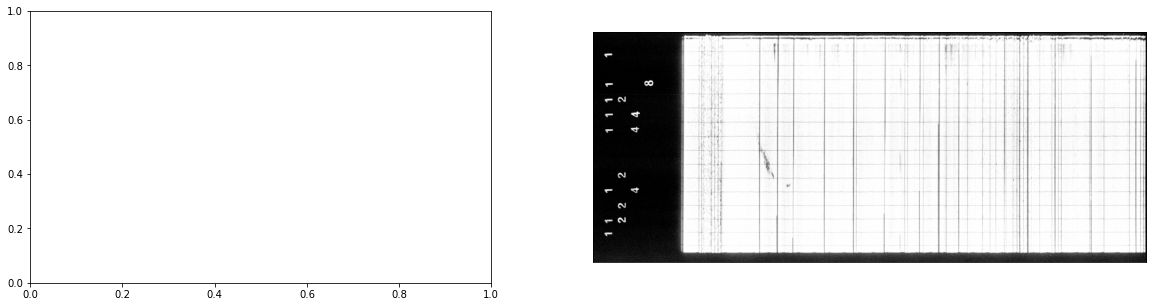

loss
nan
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth


36.png
mapped_coords-R014207975_1129-A_36.npy
(9, 2)


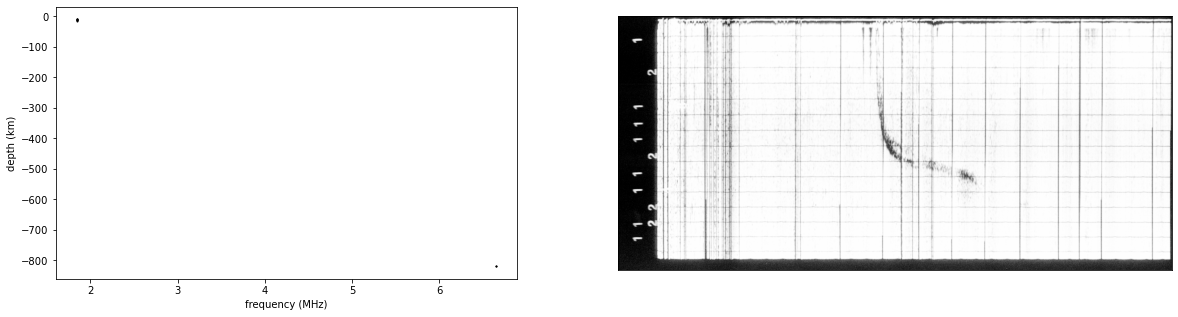

num
Resolute Bay, No.W.Territories


242.png


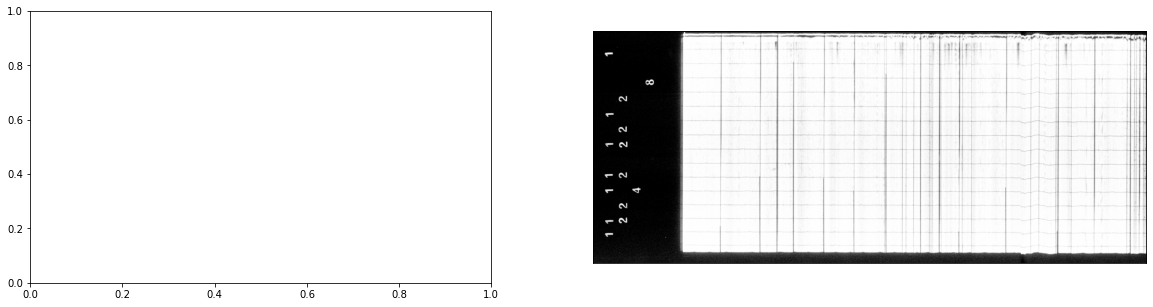

loss
nan
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth




In [9]:
i = 0 
sample_size = 10

directory = df1['Directory'].iloc[i]
subdirectory = df1['Subdirectory'].iloc[i]
print(directory)
print(subdirectory)
print('')
images_list = os.listdir(imageDir + directory + '/' + subdirectory + '/')
sample_list = random.sample(images_list, sample_size)
inspect_ionograms(directory=directory, subdirectory=subdirectory, sample_list=sample_list, imageDir=imageDir, resultDir=resultDir)